# Algorithmic Toolbox - Week 5 - Dynamic Programming 1

## 1. Money Change Again

In [1]:
%%writefile first.cpp
#include <bits/stdc++.h>

using namespace std;

const int size = (int) 1e6 + 1;
int dp[size];

int dp_change(vector<int> &coins, int amount) {
    dp[0] = 0;
    for (int m = 1; m <= amount; m++) {
        dp[m] = INT_MAX;
        for (int i = 0; i < coins.size(); i++) {
            if (m >= coins[i]) {
                int num_coins = dp[m - coins[i]] + 1;
                if (num_coins < dp[m]) {
                    dp[m] = num_coins;
                }
            }
        }
    }
    return dp[amount];
}

int main() {
    vector<int> coins = {1, 3, 4};
    int amount = 0;
    cin >> amount;
    int result = dp_change(coins, amount);
    cout << result << '\n';
    return 0;
}

Writing first.cpp


## 2. Primitive Calculator

In [2]:
%%writefile second.cpp
#include <bits/stdc++.h>

using namespace std;

vector<int> optimal_sequence(int n) {
    vector<int> sequence;
    while (n >= 1) {
        sequence.push_back(n);
        if (n % 3 == 0) {
            n /= 3;
        } else if (n % 2 == 0) {
            n /= 2;
        } else {
            n = n - 1;
        }
    }
    reverse(sequence.begin(), sequence.end());
    return sequence;
}

pair<int, int> minimum(const vector<int> &numbers) {
    int m = INT_MAX;
    int index = -1;
    int n = numbers.size();
    for (int i = 0; i < n; i++) {
        if (numbers[i] < m && numbers[i] != -1) {
            index = i; m = numbers[i];
        }
    }
    return {index, m};
}

vector<int> sequence(int n) {
    vector<int> numbers;
    vector<pair<int, int>> dp2(n + 1);
    dp2[0] = {-1, -1};
    dp2[1] = {-1, 0};
    if (n == 2) {
        dp2[2] = {1, 1};
    }
    if (n >= 3) {
        dp2[3] = {2, 1};
    }
    for (int i = 4; i <= n; i++) {
        vector<int> results = {-1, -1, -1};
        results[0] = (dp2[i - 1].second + 1);
        if (i % 2 == 0) {
            results[1] = (dp2[i / 2].second + 1);
        }
        if (i % 3 == 0) {
            results[2] = (dp2[i / 3].second + 1);
        }
        pair<int, int> m = minimum(results);
        dp2[i] = m;
    }
    int index = n;
    numbers.push_back(n);
    while(index > 1) {
        if (dp2[index].first == 0) {
            numbers.push_back(index - 1);
            index = index - 1;
        } else if (dp2[index].first == 1) {
            numbers.push_back(index / 2);
            index = index / 2;
        } else if (dp2[index].first == 2){
            numbers.push_back(index / 3);
            index = index / 3;
        } else {
            break;
        }
    }
    reverse(numbers.begin(), numbers.end());
    return numbers;
}

int main() {
    int n;
    cin >> n;
    vector<int> result = sequence(n);
    cout << result.size() - 1 << '\n';
    for (const auto &number : result) {
        cout << number << ' ';
    }
    cout << '\n';
    return 0;
}

Writing second.cpp


## 3. Edit Distance

In [3]:
%%writefile third.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

const int s = (int) 1e3 + 1;
int dp[s][s];

int min_t(int a, int b, int c) {
    if (a < b && a < c) {
        return a;
    } else if (b < a && b < c) {
        return b;
    } else {
        return c;
    }
}

int edit_distance1(string str1, string str2) {
    int m = str1.length();
    int n = str2.length();
	vector<vector<int>> dp2(m + 1, vector<int>(n + 1));
	for (int i = 0; i <= m; i++) {
		for (int j = 0; j <= n; j++) {
			if (i == 0)
				dp2[i][j] = j;
			else if (j == 0)
				dp2[i][j] = i;
			else if (str1[i - 1] == str2[j - 1])
				dp2[i][j] = dp2[i - 1][j - 1];
			else
				dp2[i][j] = 1 + min(min(dp2[i][j - 1], dp2[i - 1][j]), dp2[i - 1][j - 1]);
		}
	}
	return dp[m][n];
}

int edit_distance2(string a, string b) {
    int n = a.length();
    int m = b.length();
    for (int i = 0; i <= m; i++) {
        dp[0][i] = i;
    }
    for (int j = 0; j <= n; j++) {
        dp[j][0] = j;
    }
    for (int j = 1; j <= n; j++) {
        for (int i = 1; i <= m; i++) {
            int insertion = dp[j][i - 1] + 1;
            int deletion = dp[j - 1][i] + 1;
            int match = dp[j - 1][i - 1];
            int mismatch = dp[j - 1][i - 1] + 1;
            if (a[j - 1] == b[i - 1]) {
                dp[j][i] = dp[j - 1][i - 1];
            } else {
                dp[j][i] = min_t(insertion, deletion, mismatch);
            }
        }
    }
    return dp[n][m];
}

void stress_test() {
    string letters[] = {"a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"};
    while (true) {
        int n = rand() % 10 + 10;
        int m = rand() % 10 + 10;
        string a = "";
        for (int i = 0; i < n; i++) {
            a.append(letters[rand() % 26]);
        }
        string b = "";
        for (int i = 0; i < m; i++) {
            b.append(letters[rand() % 26]);
        }
        int res1 = edit_distance1(a, b);
        int res2 = edit_distance2(a, b);
        if (res1 != res2) {
            cout << "Wrong answer\n";
            cout << "Word 1: " << a << '\n';
            cout << "Word 2: " << b << '\n';
            cout << "User's answer:  " << res2 << '\n';
            cout << "Correct answer: " << res1 << '\n';
            break;
        } else {
            cout << "OK\n";
        }
    }
}

int main() {
    // stress_test();
    string a, b;
    cin >> a >> b;
    cout << edit_distance1(a, b) << '\n';
    return 0;
}#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

const int s = (int) 1e3 + 1;
int dp[s][s];

int min_t(int a, int b, int c) {
    if (a < b && a < c) {
        return a;
    } else if (b < a && b < c) {
        return b;
    } else {
        return c;
    }
}

int edit_distance1(string str1, string str2) {
    int m = str1.length();
    int n = str2.length();
	vector<vector<int>> dp2(m + 1, vector<int>(n + 1));
	for (int i = 0; i <= m; i++) {
		for (int j = 0; j <= n; j++) {
			if (i == 0)
				dp2[i][j] = j;
			else if (j == 0)
				dp2[i][j] = i;
			else if (str1[i - 1] == str2[j - 1])
				dp2[i][j] = dp2[i - 1][j - 1];
			else
				dp2[i][j] = 1 + min(min(dp2[i][j - 1], dp2[i - 1][j]), dp2[i - 1][j - 1]);
		}
	}
	return dp[m][n];
}

int edit_distance2(string a, string b) {
    int n = a.length();
    int m = b.length();
    for (int i = 0; i <= m; i++) {
        dp[0][i] = i;
    }
    for (int j = 0; j <= n; j++) {
        dp[j][0] = j;
    }
    for (int j = 1; j <= n; j++) {
        for (int i = 1; i <= m; i++) {
            int insertion = dp[j][i - 1] + 1;
            int deletion = dp[j - 1][i] + 1;
            int match = dp[j - 1][i - 1];
            int mismatch = dp[j - 1][i - 1] + 1;
            if (a[j - 1] == b[i - 1]) {
                dp[j][i] = dp[j - 1][i - 1];
            } else {
                dp[j][i] = min_t(insertion, deletion, mismatch);
            }
        }
    }
    return dp[n][m];
}

void stress_test() {
    string letters[] = {"a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"};
    while (true) {
        int n = rand() % 10 + 10;
        int m = rand() % 10 + 10;
        string a = "";
        for (int i = 0; i < n; i++) {
            a.append(letters[rand() % 26]);
        }
        string b = "";
        for (int i = 0; i < m; i++) {
            b.append(letters[rand() % 26]);
        }
        int res1 = edit_distance1(a, b);
        int res2 = edit_distance2(a, b);
        if (res1 != res2) {
            cout << "Wrong answer\n";
            cout << "Word 1: " << a << '\n';
            cout << "Word 2: " << b << '\n';
            cout << "User's answer:  " << res2 << '\n';
            cout << "Correct answer: " << res1 << '\n';
            break;
        } else {
            cout << "OK\n";
        }
    }
}

int main() {
    // stress_test();
    string a, b;
    cin >> a >> b;
    cout << edit_distance1(a, b) << '\n';
    return 0;
}

Writing third.cpp


## Veredict

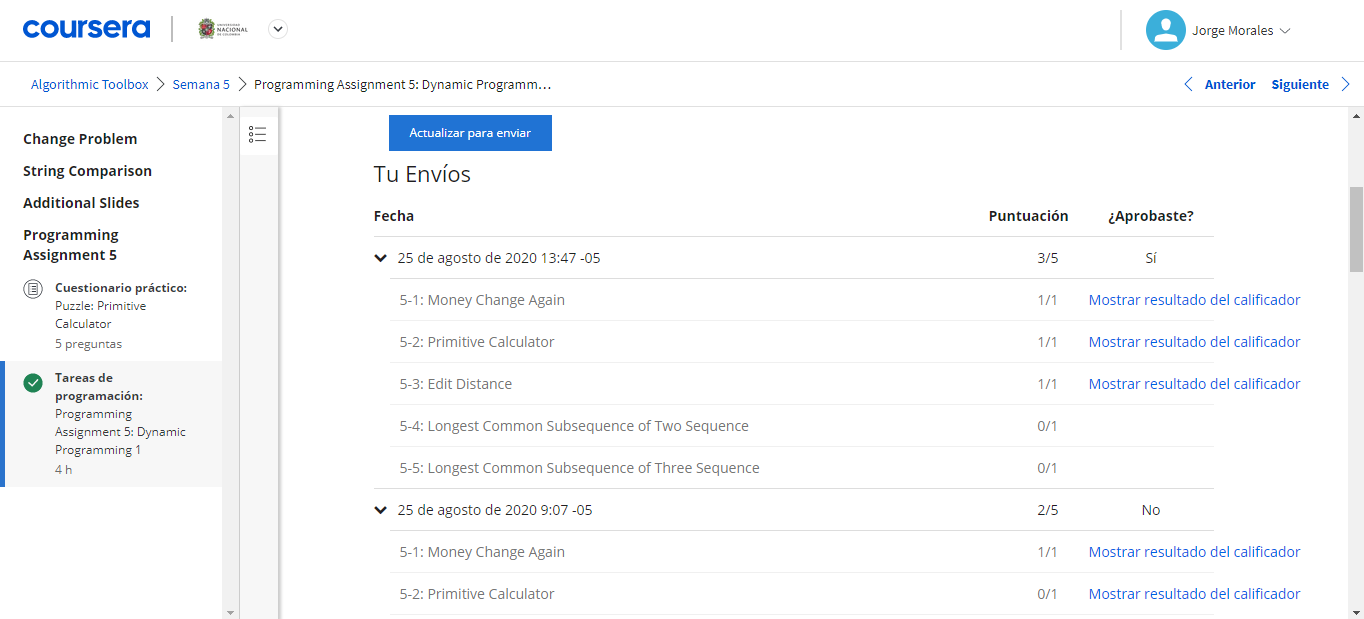